In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import Mere_functions as my
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## **Extract**

In [38]:
data = my.read_data("resume_dataset_raw.csv")
data.head()

,name,skills,education,experience,certifications,past_roles,projects_count,resume_text,job_fit_score
0,James Norman,"flask, excel, machine learning",Bachelor,13,GCP Professional,ML Engineer,2,Special news reduce however. Huge free south s...,83.85
1,Amber Middleton,"gcp, tableau, excel, deep learning, machine le...",Master,12,NaN,ML Engineer,2,Plant size medical information. Look see truth...,91.04
2,Pamela Simmons,"gcp, sql, nlp, tableau",Bachelor,9,NaN,AI Researcher,2,Design catch really help reach yes. Seem defen...,72.32
3,Nicole Ferguson,"sql, machine learning",High School,2,NaN,Software Developer,8,Imagine quality week writer give air. Sound li...,74.75
4,Steven Ford,"excel, machine learning, nlp",High School,1,Coursera ML,Data Scientist,4,Street provide after child audience coach. Dif...,61.84


In [39]:
my.rowcols(data)

The Numbers of Rows in this Data are 12345
The Numbers of Columns in this Data are 9


In [40]:
data.columns

Index(['name', 'skills', 'education', 'experience', 'certifications',
       'past_roles', 'projects_count', 'resume_text', 'job_fit_score'],
      dtype='object')

## **Transform**

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12345 entries, 0 to 12344
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            12345 non-null  object 
 1   skills          12345 non-null  object 
 2   education       12345 non-null  object 
 3   experience      12345 non-null  int64  
 4   certifications  7588 non-null   object 
 5   past_roles      11561 non-null  object 
 6   projects_count  12345 non-null  int64  
 7   resume_text     12345 non-null  object 
 8   job_fit_score   12345 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 868.1+ KB


In [42]:
def explore_column(df, col):
    import pandas as pd

    data = df[col]

    summary = {"Column": col,
        "Data Type": data.dtype,
        "Null Count": data.isnull().sum(),
        "Null %": round(data.isnull().mean() * 100, 2),
        "Unique Count": data.nunique(),
        "Top Value": data.mode().iloc[0] if not data.mode().empty else None,
        "Min": data.min() if pd.api.types.is_numeric_dtype(data) else None,
        "Max": data.max() if pd.api.types.is_numeric_dtype(data) else None,
        "Sample Values": ', '.join(map(str, data.dropna().unique()[:5]))  # convert to string
    }

    summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=[col])
    return summary_df


In [43]:
explore_column(data, "name")

,name
Column,name
Data Type,object
Null Count,0
Null %,0.0
Unique Count,11513
Top Value,James Johnson
Min,None
Max,None
Sample Values,"James Norman, Amber Middleton, Pamela Simmons,..."


In [44]:
explore_column(data, "skills")

,skills
Column,skills
Data Type,object
Null Count,0
Null %,0.0
Unique Count,7464
Top Value,"java, flask"
Min,None
Max,None
Sample Values,"flask, excel, machine learning, gcp, tableau, ..."


In [45]:
explore_column(data, "education")

,education
Column,education
Data Type,object
Null Count,0
Null %,0.0
Unique Count,4
Top Value,Bachelor
Min,None
Max,None
Sample Values,"Bachelor, Master, High School, PhD"


In [46]:
explore_column(data, "certifications")

,certifications
Column,certifications
Data Type,object
Null Count,4757
Null %,38.53
Unique Count,35
Top Value,GCP Professional
Min,None
Max,None
Sample Values,"GCP Professional, Coursera ML, Coursera ML, AW..."


In [47]:
explore_column(data, "job_fit_score")

,job_fit_score
Column,job_fit_score
Data Type,float64
Null Count,0
Null %,0.0
Unique Count,4049
Top Value,100.0
Min,46.18
Max,100.0
Sample Values,"83.85, 91.04, 72.32, 74.75, 61.84"


In [48]:
explore_column(data, "resume_text")

,resume_text
Column,resume_text
Data Type,object
Null Count,0
Null %,0.0
Unique Count,12345
Top Value,A build receive total night remain east dinner...
Min,None
Max,None
Sample Values,Special news reduce however. Huge free south s...


In [49]:
explore_column(data, "experience")

,experience
Column,experience
Data Type,int64
Null Count,0
Null %,0.0
Unique Count,16
Top Value,6
Min,0
Max,15
Sample Values,"13, 12, 9, 2, 1"


In [50]:
explore_column(data, "education")

,education
Column,education
Data Type,object
Null Count,0
Null %,0.0
Unique Count,4
Top Value,Bachelor
Min,None
Max,None
Sample Values,"Bachelor, Master, High School, PhD"


In [51]:
explore_column(data, "projects_count")

,projects_count
Column,projects_count
Data Type,int64
Null Count,0
Null %,0.0
Unique Count,10
Top Value,2
Min,1
Max,10
Sample Values,"2, 8, 4, 6, 5"


In [52]:
explore_column(data, "past_roles")

,past_roles
Column,past_roles
Data Type,object
Null Count,784
Null %,6.35
Unique Count,5
Top Value,AI Researcher
Min,None
Max,None
Sample Values,"ML Engineer, AI Researcher, Software Developer..."


In [53]:
data.isnull().sum()

name                 0
skills               0
education            0
experience           0
certifications    4757
past_roles         784
projects_count       0
resume_text          0
job_fit_score        0
dtype: int64

In [54]:
data['certifications'] = data['certifications'].apply(lambda x :[i.strip() for i in x.split(",") ] if pd.notnull(x) else [])

data

,name,skills,education,experience,certifications,past_roles,projects_count,resume_text,job_fit_score
0,James Norman,"flask, excel, machine learning",Bachelor,13,[GCP Professional],ML Engineer,2,Special news reduce however. Huge free south s...,83.85
1,Amber Middleton,"gcp, tableau, excel, deep learning, machine le...",Master,12,[],ML Engineer,2,Plant size medical information. Look see truth...,91.04
2,Pamela Simmons,"gcp, sql, nlp, tableau",Bachelor,9,[],AI Researcher,2,Design catch really help reach yes. Seem defen...,72.32
3,Nicole Ferguson,"sql, machine learning",High School,2,[],Software Developer,8,Imagine quality week writer give air. Sound li...,74.75
4,Steven Ford,"excel, machine learning, nlp",High School,1,[Coursera ML],Data Scientist,4,Street provide after child audience coach. Dif...,61.84
...,...,...,...,...,...,...,...,...,...
12340,Ronald Pittman,"excel, gcp",Master,10,[AWS Certified],Data Scientist,4,Area race space. Movement both summer away see...,87.08
12341,Kimberly Finley,"tableau, machine learning, java",Master,2,[],AI Researcher,8,Law rest before special pressure. When trainin...,77.62
12342,Pamela Anderson,"sql, machine learning, nlp",Bachelor,0,[Azure AI],NaN,4,College garden less too. Wrong consumer patter...,60.32
12343,Anthony Morales,"machine learning, deep learning, pandas, pytho...",Master,6,"[None, Udemy DS]",ML Engineer,7,Indeed art against current. Push film though c...,93.08


In [55]:
data['past_roles'] = data.apply(lambda x : "Fresher" if pd.isnull(x['past_roles']) and x['experience'] == 0 
                                else ("unknown" if pd.isnull(x['past_roles']) else x['past_roles']), axis = 1)


data['past_roles']

0               ML Engineer
1               ML Engineer
2             AI Researcher
3        Software Developer
4            Data Scientist
                ...        
12340        Data Scientist
12341         AI Researcher
12342               Fresher
12343           ML Engineer
12344           ML Engineer
Name: past_roles, Length: 12345, dtype: object

In [56]:
data.isnull().sum().sum()

0

In [57]:
data['skills'] = data['skills'].apply(lambda x : [i.strip() for i in x.split(",")])

data['skills']

0                         [flask, excel, machine learning]
1        [gcp, tableau, excel, deep learning, machine l...
2                                 [gcp, sql, nlp, tableau]
3                                  [sql, machine learning]
4                           [excel, machine learning, nlp]
                               ...                        
12340                                         [excel, gcp]
12341                    [tableau, machine learning, java]
12342                         [sql, machine learning, nlp]
12343    [machine learning, deep learning, pandas, pyth...
12344                           [java, python, aws, keras]
Name: skills, Length: 12345, dtype: object

In [58]:
data['job_fit_score'] = data['job_fit_score'].apply(lambda x : round(x) )

data['job_fit_score']

0        84
1        91
2        72
3        75
4        62
         ..
12340    87
12341    78
12342    60
12343    93
12344    80
Name: job_fit_score, Length: 12345, dtype: int64

In [59]:
data

,name,skills,education,experience,certifications,past_roles,projects_count,resume_text,job_fit_score
0,James Norman,"[flask, excel, machine learning]",Bachelor,13,[GCP Professional],ML Engineer,2,Special news reduce however. Huge free south s...,84
1,Amber Middleton,"[gcp, tableau, excel, deep learning, machine l...",Master,12,[],ML Engineer,2,Plant size medical information. Look see truth...,91
2,Pamela Simmons,"[gcp, sql, nlp, tableau]",Bachelor,9,[],AI Researcher,2,Design catch really help reach yes. Seem defen...,72
3,Nicole Ferguson,"[sql, machine learning]",High School,2,[],Software Developer,8,Imagine quality week writer give air. Sound li...,75
4,Steven Ford,"[excel, machine learning, nlp]",High School,1,[Coursera ML],Data Scientist,4,Street provide after child audience coach. Dif...,62
...,...,...,...,...,...,...,...,...,...
12340,Ronald Pittman,"[excel, gcp]",Master,10,[AWS Certified],Data Scientist,4,Area race space. Movement both summer away see...,87
12341,Kimberly Finley,"[tableau, machine learning, java]",Master,2,[],AI Researcher,8,Law rest before special pressure. When trainin...,78
12342,Pamela Anderson,"[sql, machine learning, nlp]",Bachelor,0,[Azure AI],Fresher,4,College garden less too. Wrong consumer patter...,60
12343,Anthony Morales,"[machine learning, deep learning, pandas, pyth...",Master,6,"[None, Udemy DS]",ML Engineer,7,Indeed art against current. Push film though c...,93


## **Load**

In [60]:
data.to_csv("Cleaned_data.csv", index=False)

In [61]:
df = pd.read_csv("Cleaned_data.csv")

df

,name,skills,education,experience,certifications,past_roles,projects_count,resume_text,job_fit_score
0,James Norman,"['flask', 'excel', 'machine learning']",Bachelor,13,['GCP Professional'],ML Engineer,2,Special news reduce however. Huge free south s...,84
1,Amber Middleton,"['gcp', 'tableau', 'excel', 'deep learning', '...",Master,12,[],ML Engineer,2,Plant size medical information. Look see truth...,91
2,Pamela Simmons,"['gcp', 'sql', 'nlp', 'tableau']",Bachelor,9,[],AI Researcher,2,Design catch really help reach yes. Seem defen...,72
3,Nicole Ferguson,"['sql', 'machine learning']",High School,2,[],Software Developer,8,Imagine quality week writer give air. Sound li...,75
4,Steven Ford,"['excel', 'machine learning', 'nlp']",High School,1,['Coursera ML'],Data Scientist,4,Street provide after child audience coach. Dif...,62
...,...,...,...,...,...,...,...,...,...
12340,Ronald Pittman,"['excel', 'gcp']",Master,10,['AWS Certified'],Data Scientist,4,Area race space. Movement both summer away see...,87
12341,Kimberly Finley,"['tableau', 'machine learning', 'java']",Master,2,[],AI Researcher,8,Law rest before special pressure. When trainin...,78
12342,Pamela Anderson,"['sql', 'machine learning', 'nlp']",Bachelor,0,['Azure AI'],Fresher,4,College garden less too. Wrong consumer patter...,60
12343,Anthony Morales,"['machine learning', 'deep learning', 'pandas'...",Master,6,"['None', 'Udemy DS']",ML Engineer,7,Indeed art against current. Push film though c...,93


## **Exploratory Data Analysis**

### **UniVariate Analysis**

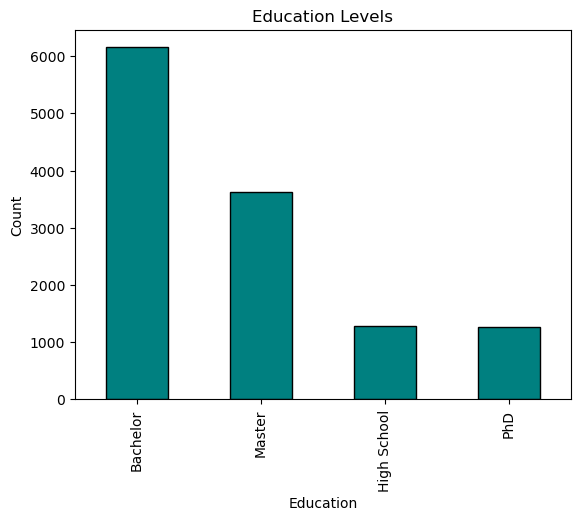

In [62]:
df['education'].value_counts().plot(kind='bar', color='teal', edgecolor = 'black')
plt.title("Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()


INFERENCES :

- The majority of candidates hold a Bachelor's degree, indicating it is the most common qualification among applicants.
- Master's degree holders form the second largest group, suggesting a significant number of advanced degree candidates.
- High School and PhD qualifications are equally represented but in significantly lower proportions.
- The low number of PhD holders may imply either limited demand for highly specialized roles or a smaller talent pool.
- Bachelor's and Master's degree holders together account for the vast majority of the applicant dataset.


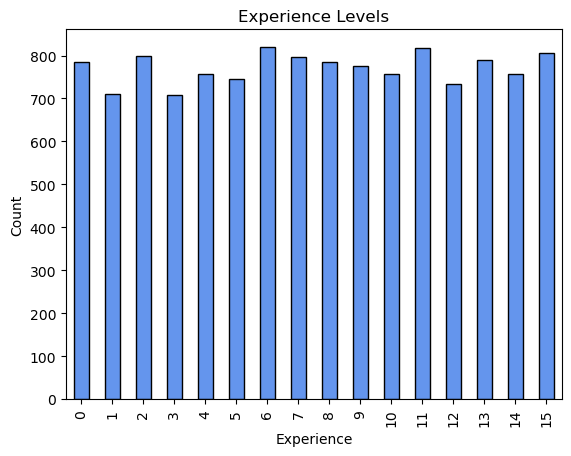

In [63]:
cnt = df['experience'].value_counts()

cnt = cnt.sort_index(ascending = True)


cnt.plot(kind='bar', color='''cornflowerblue''', edgecolor = 'black')
plt.title("Experience Levels")
plt.xlabel("Experience")
plt.ylabel("Count")
plt.show()

INFERENCES :


This chart shows us the breakdown of applicants by how many years they've been working.

* **All experience levels welcome (and available)!** This is quite unique! Unlike many job markets where you see a huge number of freshers and then fewer experienced folks, your applicant pool has a remarkably even spread. Whether you need someone with 0 years of experience or 15 years, you're finding a consistent number of applicants.
* **Great flexibility for hiring:** This is a big advantage for you! It means you're not limited to just hiring junior roles or struggling to find senior people. You have a steady supply of talent at every career stage.
* **No specific 'sweet spot' for experience:** There isn't one particular experience level that dominates, which makes your hiring options very broad.

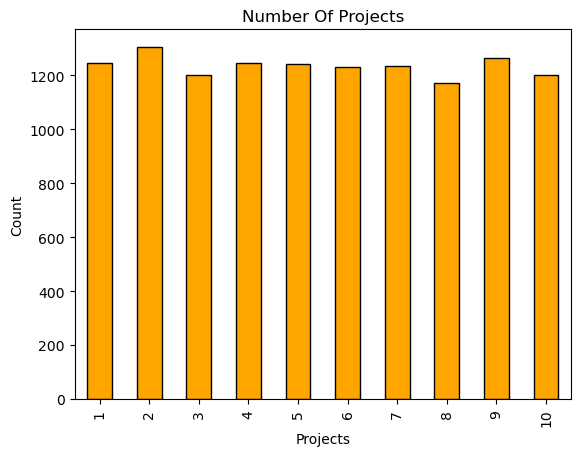

In [64]:
pro = df['projects_count'].value_counts()

pro = pro.sort_index(ascending = True)


pro.plot(kind='bar', color='''orange''', edgecolor = 'black')
plt.title("Number Of Projects")
plt.xlabel("Projects")
plt.ylabel("Count")
plt.show()

INFERENCES

This chart shows us how much hands-on experience applicants have by looking at the number of projects they've completed.

* **Everyone's got projects!** It's really interesting – whether someone has 1 project or 10, there's a pretty consistent number of applicants. This tells us that almost everyone applying has been busy building things.
* **Experience is key:** This high and steady number of projects means that having practical experience, not just theoretical knowledge, is very common among your applicants. It's almost expected!
* **Quality over just quantity?** Since the numbers are similar across the board, it might suggest that after a certain point (say, 1 or 2 projects), having *more* projects doesn't necessarily make an applicant stand out *just* by the count alone. The quality or complexity of those projects might become more important.

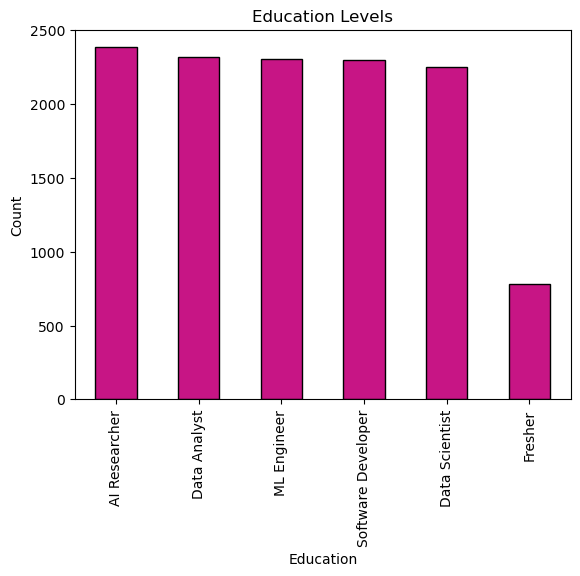

In [65]:
df['past_roles'].value_counts().plot(kind='bar', color='mediumvioletred', edgecolor = 'black')
plt.title("Education Levels")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

INFERENCES :

Okay, first off, the chart labeled "Education Levels" actually seems to be showing us **what kind of jobs people are applying for**. It's like looking at which specific roles are attracting the most attention.

* **Everyone wants these cool tech jobs!** It's super clear that roles like "AI Researcher," "Data Analyst," "ML Engineer," "Software Developer," and "Data Scientist" are incredibly popular. Almost the same huge number of people are applying for each of them. This means you have a big pool of talent for these key tech positions.
* **"Freshers" are a smaller, special group:** There are fewer people applying if they just label themselves as a "Fresher." This could mean that most new grads already know what they want to specialize in (like Data Scientist), or maybe there aren't as many general entry-level spots open.
* **Good news for finding specialists:** Because so many people are applying for these specific tech roles, it tells us that there's a good supply of folks with those exact skills in the market.

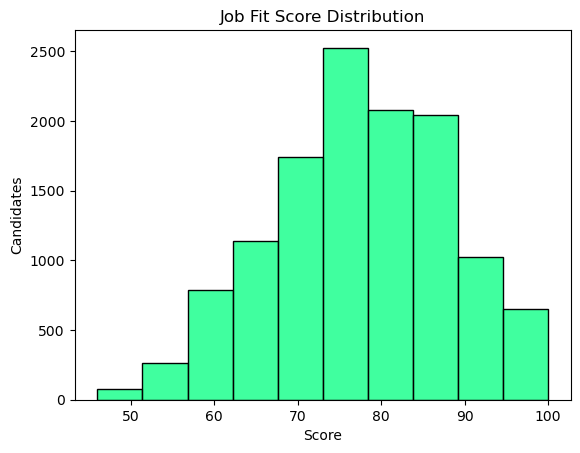

In [66]:
sns.histplot(df['job_fit_score'], bins=10, color='springgreen', edgecolor = 'black')
plt.title("Job Fit Score Distribution")
plt.xlabel("Score")
plt.ylabel("Candidates")
plt.show()


INFERENCES :


This chart is super helpful because it tells us how well candidates match the job requirements, according to some scoring system.

* **Most people are a good fit!** The chart looks like a gentle hill, with the highest point right in the middle, around a score of 75-80. This is fantastic! It means the largest group of applicants are a good, solid match for the jobs.
* **Fewer extreme cases:** You don't see many people with really low scores (meaning they're not a good fit at all), and also fewer people with extremely high, perfect scores. This is pretty normal – most people fall somewhere in the middle, proving they're capable.
* **Easy to find good candidates:** This kind of distribution is great for hiring. It means your scoring system is doing a good job, and you have a large pool of well-suited candidates to choose from.

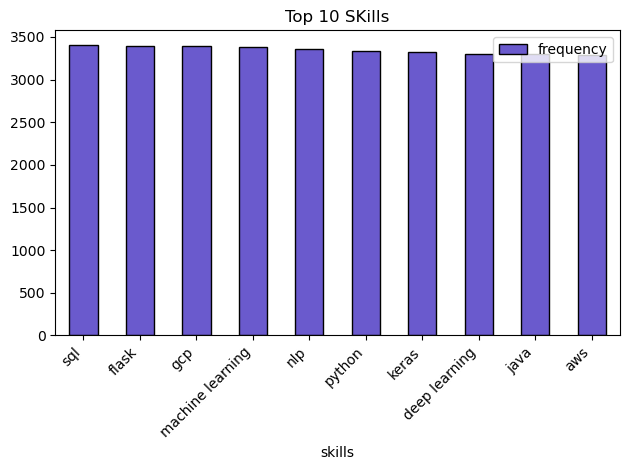

In [67]:
df['skills'] = df['skills'].apply(
    lambda x: [i.replace("'", "").replace("[", "").replace("]", "").strip() for i in x.split(',')] 
    if isinstance(x, str) else x)

all_skills = [j.strip() for i in df['skills'] for j in i]

cnt = Counter(all_skills)
pd.DataFrame(cnt.most_common(10), columns=['skills' , 'frequency']).plot(x = 'skills', y = 'frequency', kind='bar', color = 'slateblue', edgecolor = 'k')


plt.title("Top 10 SKills")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

INFERENCES :



This chart, "Top 10 Skills," tells us which specific abilities and tools candidates list most frequently.

* **Everyone has these core tech skills!** Skills like "SQL" (for databases), "Flask" (a web tool), "GCP" (Google Cloud), "Machine Learning," "NLP" (Natural Language Processing), "Python" (a programming language), "Keras" (a machine learning tool), "Deep Learning," "Java" (another programming language), and "AWS" (Amazon Web Services) are all incredibly common. They show up almost equally for everyone.
* **Strong focus on Data Science and AI:** Seeing skills like "Machine Learning," "NLP," "Python," "Keras," and "Deep Learning" pop up so much tells us that your applicants are heavily into the world of data science, artificial intelligence, and how to use cloud services.
* **Python is a foundation:** Python is there, which is no surprise since it's super important for these tech areas. And "Flask" being high up means people are using Python for web-related projects too.
* **Candidates are well-rounded:** The fact that so many people have a wide range of these important tech skills suggests that your applicant pool is generally very capable and has a good grasp of many modern technologies.

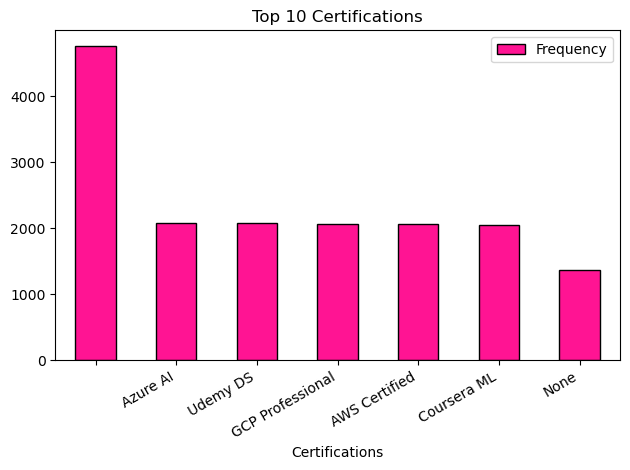

In [68]:
df['certifications'] = df['certifications'].apply(
    lambda x: [i.replace("'", "").replace("[","").replace("]","").strip() for i in x.split(',')] if isinstance(x, str) else x
)

all_cert = [j.strip() for i in df['certifications'] for j in i]

cnt = Counter(all_cert)

pd.DataFrame(cnt.most_common(10), columns=['Certifications', 'Frequency']).plot(x = 'Certifications', y = 'Frequency', kind = "bar", color = 'deeppink', edgecolor = 'black')

plt.title("Top 10 Certifications")
plt.xticks(rotation = 30, ha = 'right')
plt.tight_layout()
plt.show()

INFERENCES :



This chart, "Top 10 Certifications," shows us which professional certificates applicants have earned.

* **Azure AI is a BIG deal!** Wow, the "Azure AI" certificate is super popular – way more people have it than any other. This tells us that a lot of your applicants are really into Artificial Intelligence using Microsoft's Azure cloud.
* **Lots of cloud and AI certificates:** After Azure AI, you see other popular certificates like "Udemy DS" (Data Science from Udemy), "GCP Professional" (Google Cloud), "AWS Certified" (Amazon Web Services), and "Coursera ML" (Machine Learning from Coursera). This means candidates are getting certified in various cloud technologies and machine learning.
* **Certificates are common:** The high numbers for all these certificates show that many, many applicants are taking the time to get formal proof of their skills. It's a common thing to do!
* **Few have 'no' certificate:** Interestingly, the "None" category (meaning no certificate) is much smaller than the others. This suggests that most people applying have at least one of these popular certifications.

FOR VISUALIZATION OF RESUME TEXT COLUMN WE NEED A FEW REFINEMENT LIKE CLEANING AND TOKENIZATION OF THAT COLUMN

CLEANING

In [69]:
import re
import nltk
from nltk.corpus import stopwords



nltk.download("stopwords")


stops = set(stopwords.words("english"))

def cleaning(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    word = [i for i in text.split() if i not in stops]
    return " ".join(word)


df['clean_resume_text'] = df['resume_text'].apply(cleaning)

df['clean_resume_text']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AVIRAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        special news reduce however huge free south be...
1        plant size medical information look see truth ...
2        design catch really help reach yes seem defens...
3        imagine quality week writer give air sound lik...
4        street provide child audience coach different ...
                               ...                        
12340    area race space movement summer away see rule ...
12341    law rest special pressure training stand along...
12342    college garden less wrong consumer pattern mou...
12343    indeed art current push film though coach insi...
12344    chance month team fast name risk able sport in...
Name: clean_resume_text, Length: 12345, dtype: object

TOKENIZATION

In [70]:
all_words = " ".join(df['clean_resume_text']).split()

frequency = Counter(all_words)

words_df = pd.DataFrame(frequency.most_common(25), columns=['Words', "Freq"])

words_df

,Words,Freq
0,example,517
1,top,515
2,according,513
3,station,512
4,attack,511
5,six,511
6,thousand,510
7,music,510
8,involve,509
9,trip,509


BAR PLOTTING

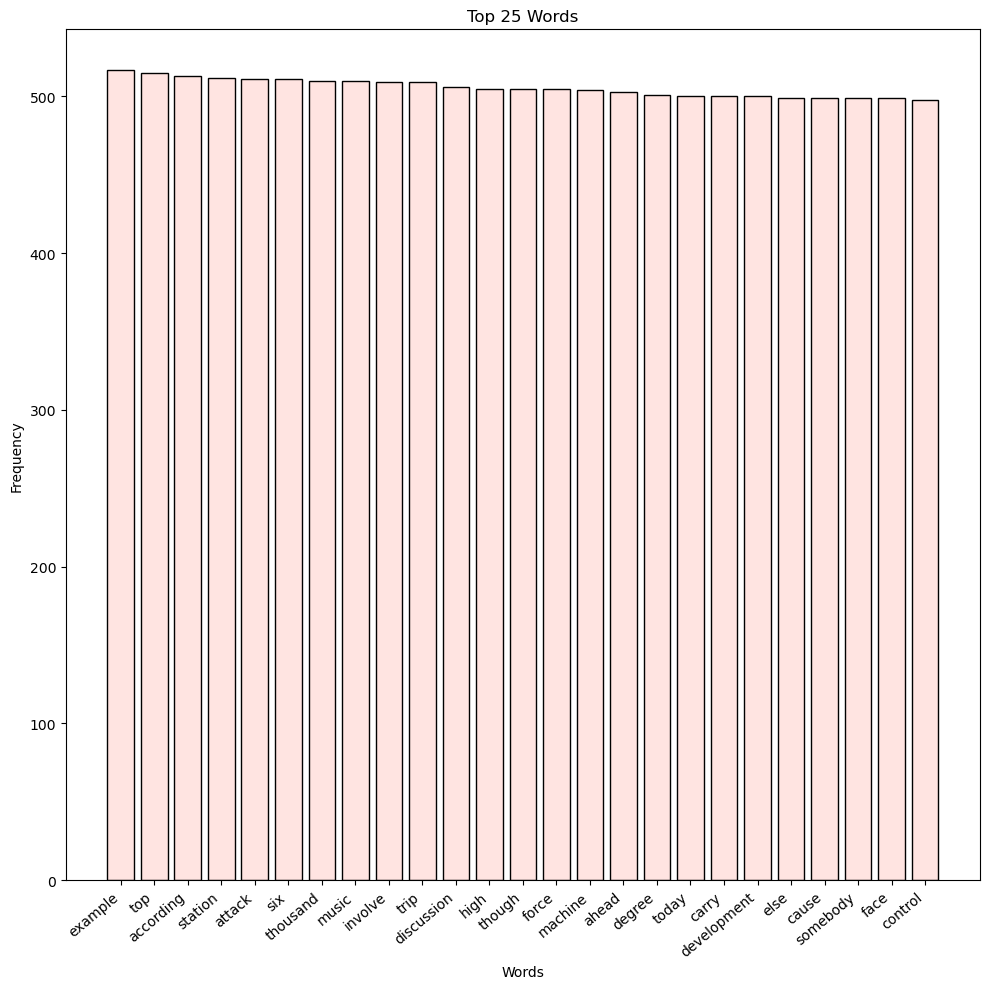

In [84]:
plt.figure(figsize=(10,10))

plt.bar(words_df['Words'], words_df['Freq'], color = 'mistyrose', edgecolor = 'black')

plt.title("Top 25 Words")

plt.xlabel("Words")

plt.ylabel("Frequency")

plt.xticks(rotation = 40, ha = "right")

plt.tight_layout()

plt.show()

INFERENCES :


This chart, "Top 25 Words," basically looks at all the words used in people's applications (like their resumes or profiles) and tells us which ones pop up most often.

* **Just everyday words, mostly:** When we look at words like "example," "top," "according," or "development," they're pretty general. They don't really tell us much about specific job skills or what kind of work people do.
* **Need to dig deeper:** Right now, these words are like common building blocks in language. To truly understand what people are saying about their skills or interests, we'd need to clean up this list a bit – take out these common "filler" words and look for the unique ones. Think of it like trying to find specific ingredients in a soup when all you see is water!

WORDCLOUD

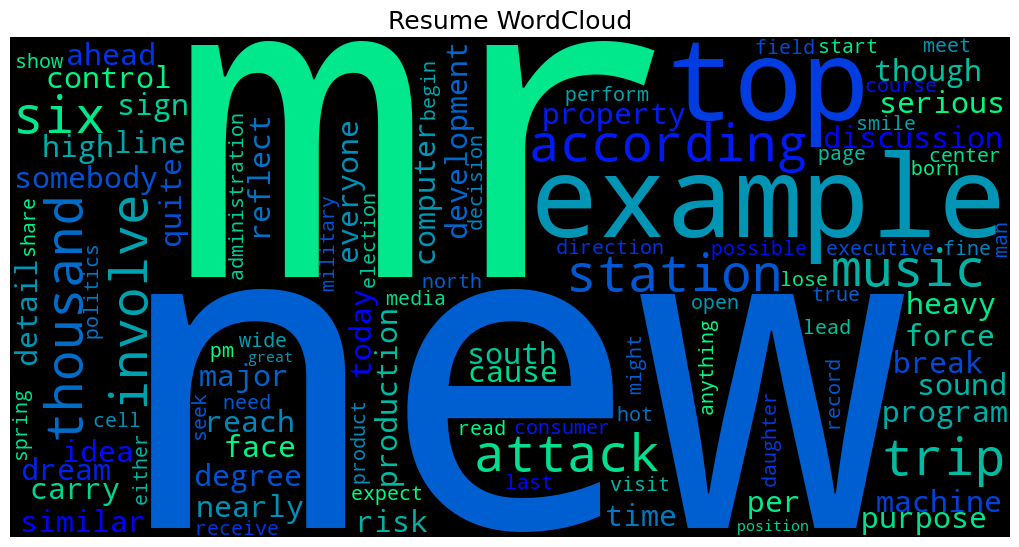

In [81]:
import wordcloud

res_text = " ".join(df['clean_resume_text'])

cloud = wordcloud.WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='winter',
    max_words=100
).generate(res_text)


plt.figure(figsize=(10,10))

plt.imshow(cloud, interpolation='bicubic')

plt.axis('off')

plt.title("Resume WordCloud", fontsize=18)

plt.tight_layout(pad=0)

plt.show()

### **BiVariate Analysis**

([0, 1, 2, 3],
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'High School'),
  Text(3, 0, 'PhD')])

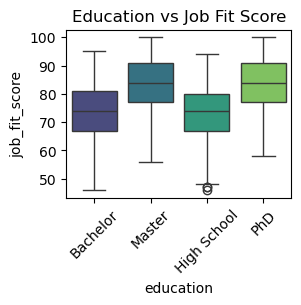

In [85]:
plt.subplot(2, 2, 1)
sns.boxplot(x='education', y='job_fit_score', data=df, palette='viridis')
plt.title('Education vs Job Fit Score')
plt.xticks(rotation=45)

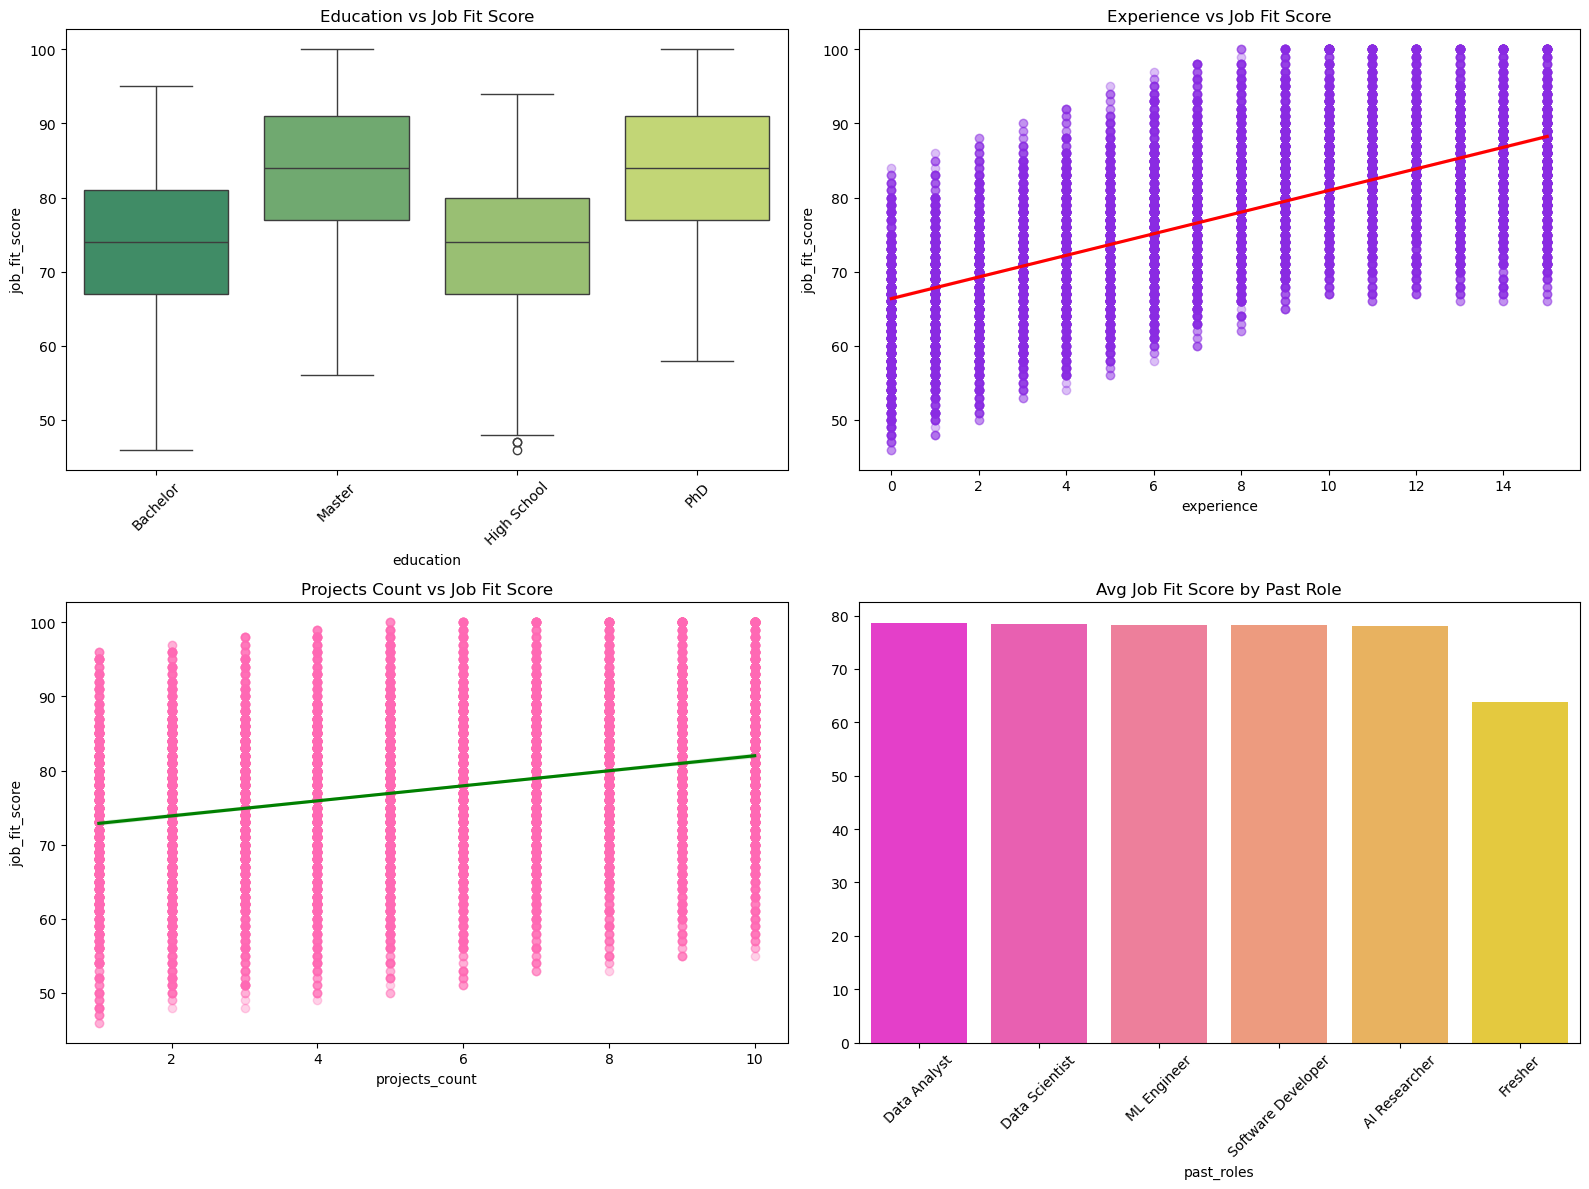

In [90]:


plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
sns.boxplot(x='education', y='job_fit_score', data=df, palette='summer' )
plt.title('Education vs Job Fit Score')
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
sns.regplot(x='experience', y='job_fit_score', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, color= 'blueviolet')
plt.title('Experience vs Job Fit Score')


plt.subplot(2, 2, 3)
sns.regplot(x='projects_count', y='job_fit_score', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'green'}, color='hotpink')
plt.title('Projects Count vs Job Fit Score')


plt.subplot(2, 2, 4)
role_mean = df.groupby('past_roles')['job_fit_score'].mean().sort_values(ascending=False)
sns.barplot(x=role_mean.index, y=role_mean.values, palette='spring')
plt.title('Avg Job Fit Score by Past Role')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### INFERENCES

This big picture shows us four different ways to look at how well someone fits a job, based on their education, experience, projects, and past job roles.

#### 1. Education vs Job Fit Score

This chart compares how well people fit a job based on their highest education level (Bachelor's, Master's, High School, PhD). The box shows where most people fall, and the line in the middle is the average.

* **Master's and PhDs generally fit best:** People with Master's and PhDs tend to have higher job fit scores on average, and their scores are more consistently high. This suggests that more advanced degrees often lead to a better match.
* **Bachelor's degrees are a solid fit:** Bachelor's degree holders also show good job fit, though with a slightly wider range of scores compared to Master's.
* **High School degrees show more variety:** People with only a High School degree have a wider spread of job fit scores, including some lower ones. This means their fit can vary a lot more.

#### 2. Experience vs Job Fit Score

This chart looks at how job fit changes as someone gains more years of experience. Each purple dot is a person, and the red line shows the general trend.

* **More experience, better fit:** The red line goes up as experience increases. This clearly shows that, generally, the more years of experience a candidate has, the higher their job fit score tends to be.
* **Experience consistently helps:** Even though there's some scatter, the trend is pretty clear across all experience levels up to 15 years.

#### 3. Projects Count vs Job Fit Score

This chart explores if having more projects leads to a better job fit. Each pink dot is a person, and the green line shows the trend.

* **More projects, slightly better fit:** The green line shows a slight upward trend. This means that having more projects generally leads to a slightly higher job fit score, though the increase isn't as dramatic as with experience.
* **Projects are important, but not a huge jump:** While positive, the impact of each additional project on the job fit score seems less pronounced compared to years of experience. Many people with fewer projects still have high scores, and vice versa.

#### 4. Avg Job Fit Score by Past Role

This chart compares the average job fit score for candidates coming from different previous job roles.

* **AI Researchers and Software Developers are top fits:** "AI Researcher" and "Software Developer" roles have the highest average job fit scores, indicating that candidates from these backgrounds tend to be the best match.
* **Data roles also high:** "Data Scientist," "ML Engineer," and "Data Analyst" also show very high average job fit scores, very close to the top two. This means people from these data-focused roles are also a great match.
* **Freshers fit a bit lower:** "Fresher" candidates (those new to the job market) have a noticeably lower average job fit score compared to all the other specialized roles. This is expected, as they are just starting out and may not yet fully align with specific job requirements.